## Distribution and Parameter Inference

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [2]:
objData = pd.read_excel('../dataset/default of credit card clients.xls', skiprows=[1, 2])
objData

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
1,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
2,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
3,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
4,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29995,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29996,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29997,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
objResult = stats.rv_continuous.fit(stats.norm, objData['X1'])
print("Mean, Sigma: ", objResult)

Mean, Sigma:  (167489.24424801697, 129744.8639212595)


In [20]:
objResult = stats.rv_continuous.fit(stats.gamma, objData['X1'])
print("Alpha : ", objResult[0])
print("Location : ", objResult[1])
print("Beta : ", 1 / objResult[2])

Alpha :  1.1572769644988954
Location :  9440.977446027482
Beta :  7.322301167530901e-06


In [4]:
# Calculate 1st/2nd order moments
dblSampleMoments1 = 0
dblSampleMoments2 = 0

for i in range(len(objData['X1'])):
    dblSampleMoments1 = dblSampleMoments1 + objData['X1'][i]
    dblSampleMoments2 = dblSampleMoments2 + math.pow(objData['X1'][i], 2)

dblSampleMoments1 = dblSampleMoments1 / float(len(objData['X1']))
dblSampleMoments2 = dblSampleMoments2 / float(len(objData['X1']))

In [5]:
dblMu = dblSampleMoments1
dblSigmaSquared = dblSampleMoments2 - math.pow(dblSampleMoments1, 2)
dblAlpha = math.pow(dblSampleMoments1, 2) / (dblSampleMoments2 - math.pow(dblSampleMoments1, 2))
dblBeta = dblSampleMoments1 / (dblSampleMoments2 - math.pow(dblSampleMoments1, 2))

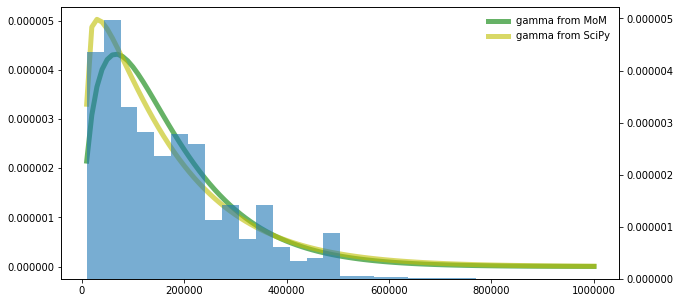

In [21]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

x = np.linspace(min(objData['X1']), max(objData['X1']), 100)
ax1.plot(x, stats.gamma.pdf(x, a=dblAlpha, scale=1/dblBeta), 'g-', lw=5, alpha=0.6, label='gamma from MoM')
ax1.plot(x, stats.gamma.pdf(x, objResult[0], objResult[1], objResult[2]), 'y-', lw=5, alpha=0.6, label='gamma from SciPy')
ax2.hist(objData['X1'], bins=30, density=True, alpha=0.6)

ax1.legend(loc='best', frameon=False)
plt.show()

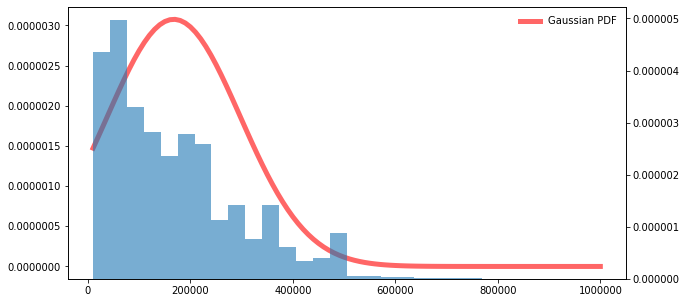

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

x = np.linspace(min(objData['X1']), max(objData['X1']), 100)
ax1.plot(x, stats.norm.pdf(x, dblMu, math.sqrt(dblSigmaSquared)), 'r-', lw=5, alpha=0.6, label='Gaussian PDF')
ax2.hist(objData['X1'], bins=30, density=True, alpha=0.6)

ax1.legend(loc='best', frameon=False)
plt.show()